In [50]:
import time
import matplotlib.pyplot as plt
import numpy as np

n_cities = 100 # Number of cities
cities = np.random.randint(1, 101, size=(n_cities, n_cities)) # Initizaliting adjcency matrix with weight from 1 to 100 and n cities

# the evolution of the best path by each iteration
def plot_best_path(local_best_path_len_iter, global_best_path_len_iter):
    plt.figure(figsize=(10, 6))
    plt.plot(local_best_path_len_iter, marker='o', label='Local Best Path')
    plt.plot(global_best_path_len_iter, marker='o', label='Global Best Path')
    plt.title("The Evolution of the Best Path Length by Each Iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Best Path Length")
    plt.grid(True)
    plt.legend()
    plt.show()


# the evolution of the time taken by trying with different scale of n_cities
def plot_time_n_cities(time_ncities, n_cities_list):
    plt.figure(figsize=(10, 6))
    plt.plot(time_ncities, n_cities_list, marker='o')
    plt.title("The Evolution of the Time Taken by Trying with Different Scale of n_cities")
    plt.ylabel("Number of Cities")
    plt.xlabel("Execution Time (s)")
    plt.grid(True)
    plt.show()

# Plotting the time taken varying the parameters (alpha,beta, n_trucks, n_ants, n_iterations)
def plot_time_param(time_params, params, label):
    plt.figure(figsize=(10, 6))
    plt.plot(params, time_params, marker='o', color='tab:red')
    plt.title(f"The Evolution of Time Taken varying {label}")
    plt.xlabel(label)
    plt.ylabel("Execution Time (s)")
    plt.grid(True)
    plt.show()
    
# Plotting the distance in km varying the parameters (alpha,beta, n_trucks, n_ants, n_iterations)
def plot_distance_param(distance_params, params, label):
    plt.figure(figsize=(10, 6))
    plt.plot(params, distance_params, marker='o', color='tab:blue')
    plt.title(f"The Evolution of Best Path Distance varying {label}")
    plt.xlabel(label)
    plt.ylabel("Best Path Distance")
    plt.grid(True)
    plt.show()


# Modify ant_colony_optimization_vrp to return the best path length per iteration and execution time
def ant_colony_optimization_vrp(cities, n_ants, n_iterations, alpha, beta, evaporation_rate, Q, n_trucks):
    '''
    ACO for Vehicle Routing Problem.
    Parameters:
        cities: 2D array of distances between cities (adjacency matrix)
        n_ants: Number of ants running per iteration
        n_iterations: Number of iterations
        alpha: Importance of pheromone
        beta: Importance of distance
        evaporation_rate: Rate at which pheromone evaporates
        Q: Constant for pheromone update / Amount of pheromones ants release
        n_trucks: Number of trucks available
    Returns:
        best_paths: List of best paths found by the algorithm
        best_total_length: Total length of the best paths
    '''
    pheromone = np.ones((n_cities, n_cities)) # Initizaliting pheromone matrix with 1s
    best_paths = None 
    best_total_length = np.inf
    max_cities_per_truck = n_cities // n_trucks  # Maximum cities each truck can visit
    local_best_path_len_iter = []  # Record the best local path length per iteration
    global_best_path_len_iter = []  # Record the best global path length per iteration
    start_time = time.time()  # Record the start time
    for iteration in range(n_iterations):
        all_paths = []
        all_total_lengths = []

        for ant in range(n_ants):
            paths = []
            total_length = 0
            visited_global = np.zeros(n_cities, dtype=bool)  # Global visited array for all trucks in this iteration (filled with False)

            for truck in range(n_trucks):
                visited = visited_global.copy()  # Using the global visited array for each truck
                current_point = 0  # Start from the depot
                # start from depot and visit max_cities_per_truck cities
                visited[current_point] = True 
                path = [current_point]
                path_length = 0
                cities_visited = 0  # Count of visited cities

                # Loop through not visited cities
                while np.any(np.logical_not(visited)) and cities_visited < max_cities_per_truck :
                    unvisited = np.where(np.logical_not(visited))[0] # getting the next unvisited cities
                    # calculating the probabilities of the next cities
                    probabilities = pheromone[current_point][unvisited]**alpha * (1/cities[current_point][unvisited])**beta
                    # if all the probabilities are 0, set them to 1/len(probabilities) to avoid division by 0
                    if np.sum(probabilities) == 0:
                        probabilities = np.ones_like(probabilities) / len(probabilities)
                    else:
                        probabilities /= np.sum(probabilities) # normalizing the probabilities

                    next_point = np.random.choice(unvisited, p=probabilities) # choosing the next city based on the probabilities
                    path.append(next_point)
                    path_length += cities[current_point][next_point]
                    visited[next_point] = True
                    visited_global[next_point] = True  # Mark city as visited in the global array
                    current_point = next_point
                    cities_visited += 1  # Increase the count of visited cities

                path_length += cities[path[-1]][0] # adding the distance from the last city to the depot
                path.append(0) # adding the depot to the path to complete the cycle
                paths.append(path)
                total_length += path_length

            all_paths.append(paths)
            all_total_lengths.append(total_length)
            if total_length < best_total_length:
                best_paths = paths
                best_total_length = total_length

        local_best_total_length = min(all_total_lengths)  # Find the local best path length
        local_best_path_len_iter.append(local_best_total_length)
        global_best_path_len_iter.append(best_total_length)

        pheromone *= evaporation_rate # Evaporate pheromone

        for paths, total_length in zip(all_paths, all_total_lengths):
            for path in paths:
                pheromone[path[:-1], path[1:]] += Q / total_length # Update pheromone
                pheromone[path[-1], path[0]] += Q / total_length # Update pheromone

        execution_time = time.time() - start_time  # Calculate the execution time
    return best_paths, best_total_length, local_best_path_len_iter, global_best_path_len_iter, execution_time





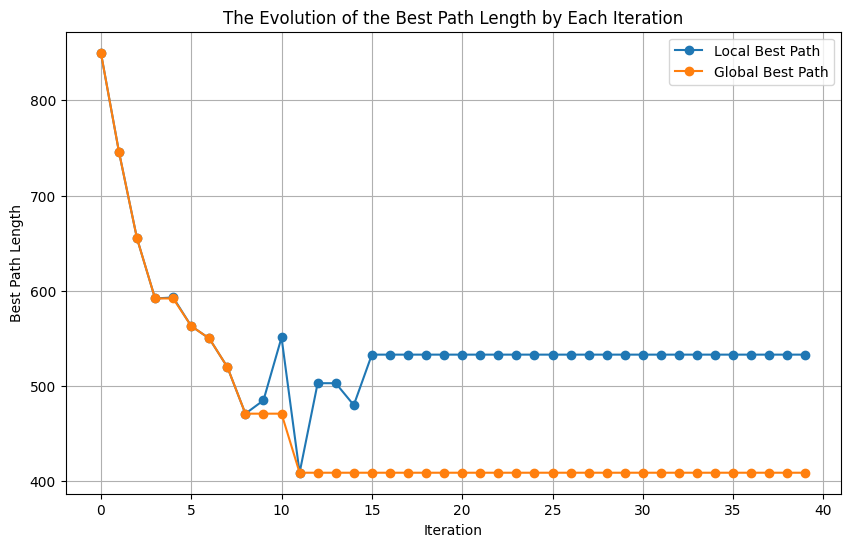

In [41]:
best_paths, best_total_length, local_best_path_len_iter, global_best_path_len_iter, execution_time = ant_colony_optimization_vrp(cities, n_ants=10, n_iterations=40, alpha=2, beta=2, evaporation_rate=0.4, Q=70, n_trucks=3)
plot_best_path(local_best_path_len_iter, global_best_path_len_iter)


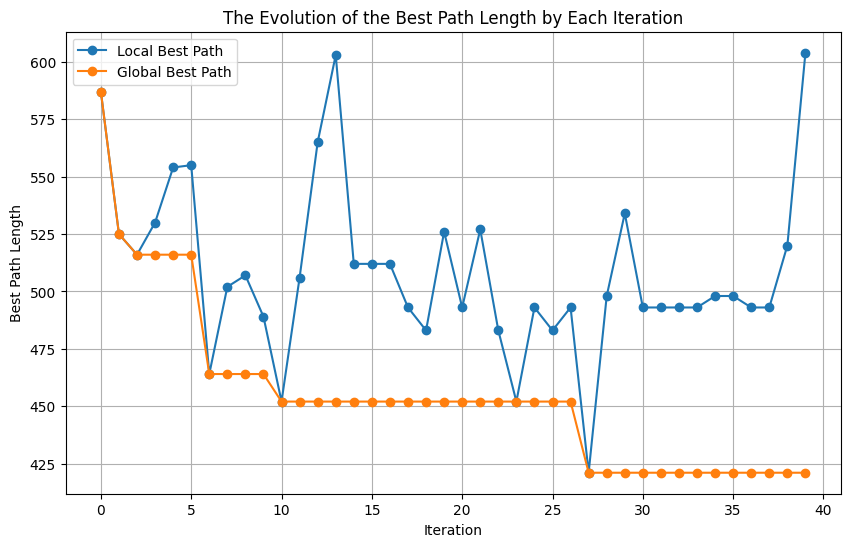

In [51]:
distance_test_cities = np.random.randint(1, 101, size=(1000, 1000))
best_paths, best_total_length, local_best_path_len_iter, global_best_path_len_iter, execution_time = ant_colony_optimization_vrp(distance_test_cities, n_ants=10, n_iterations=40, alpha=2, beta=3, evaporation_rate=0.4, Q=70, n_trucks=3)
plot_best_path(local_best_path_len_iter, global_best_path_len_iter)

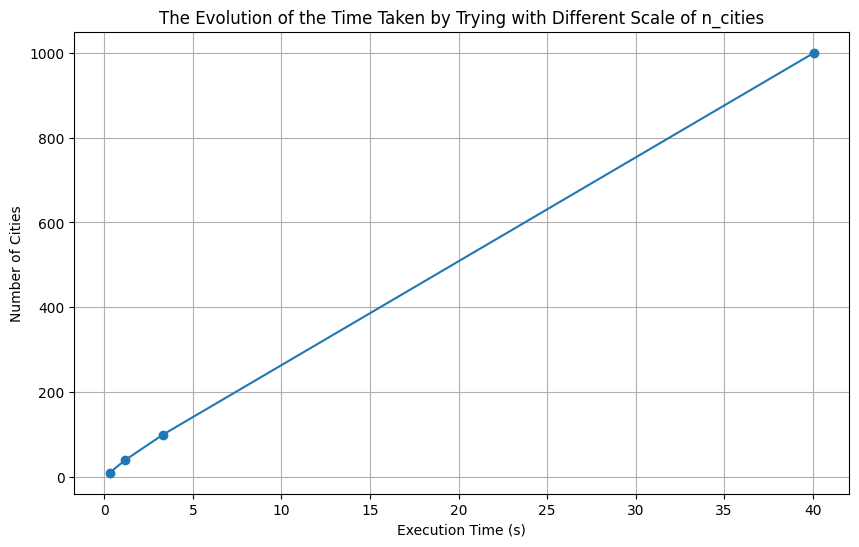

In [26]:
n_cities_list = [10, 40, 100, 1000]
time_ncities = []
for n_cities in n_cities_list:
    test_cities = np.random.randint(1, 101, size=(n_cities, n_cities))
    _, _, _, _,  execution_time = ant_colony_optimization_vrp(test_cities, n_ants=10, n_iterations=40, alpha=2, beta=2, evaporation_rate=0.4, Q=70, n_trucks=3)
    time_ncities.append(execution_time)

plot_time_n_cities(time_ncities, n_cities_list)


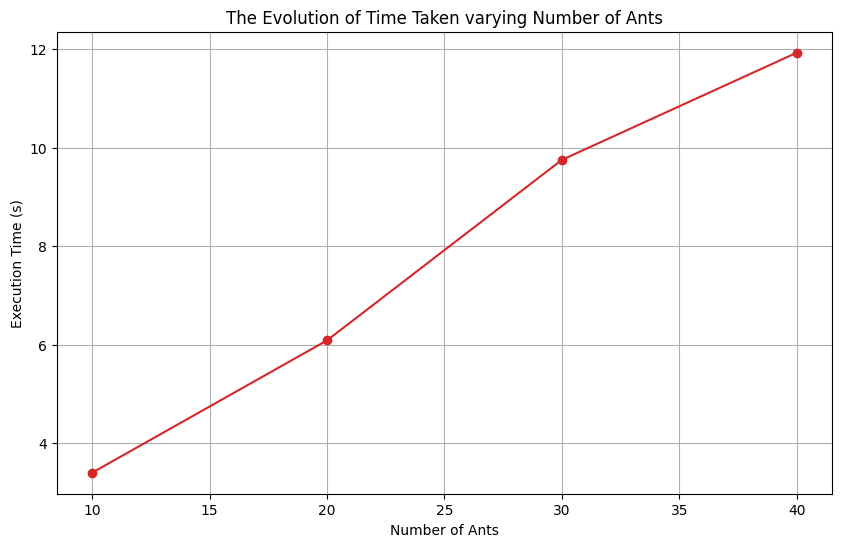

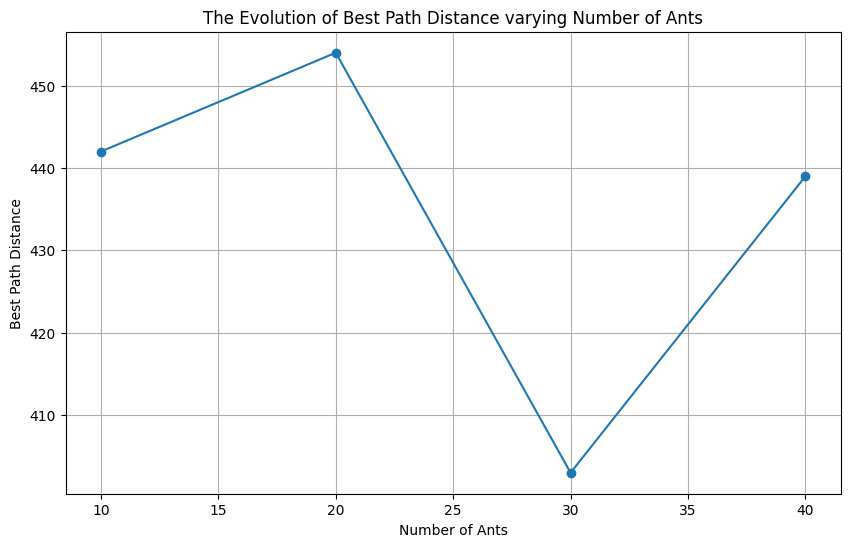

In [40]:
n_ants_list = [10, 20, 30, 40]
time_params = []
distance_params = []
for n_ants in n_ants_list:
    _, best_total_length, _, _, execution_time = ant_colony_optimization_vrp(cities, n_ants=n_ants, n_iterations=40, alpha=2, beta=2, evaporation_rate=0.4, Q=70, n_trucks=3)
    time_params.append(execution_time)
    distance_params.append(best_total_length)

plot_time_param(time_params, n_ants_list, 'Number of Ants')
plot_distance_param(distance_params, n_ants_list, 'Number of Ants')

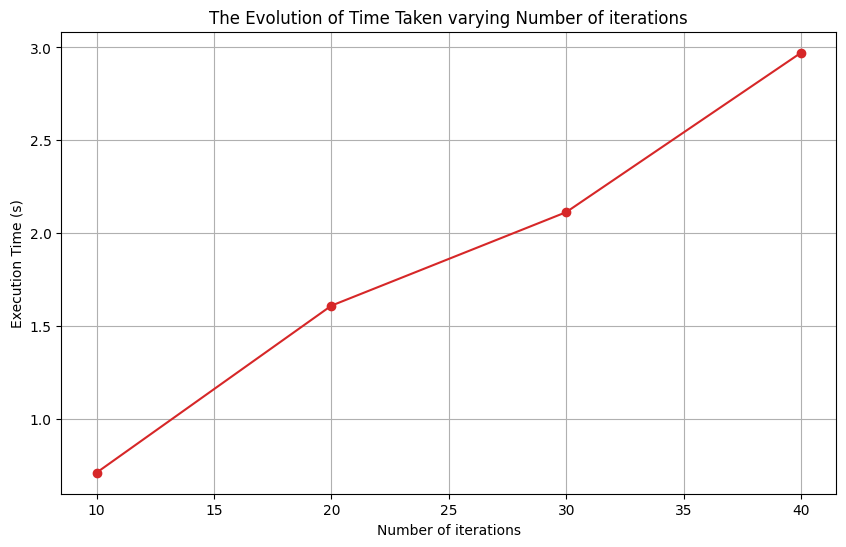

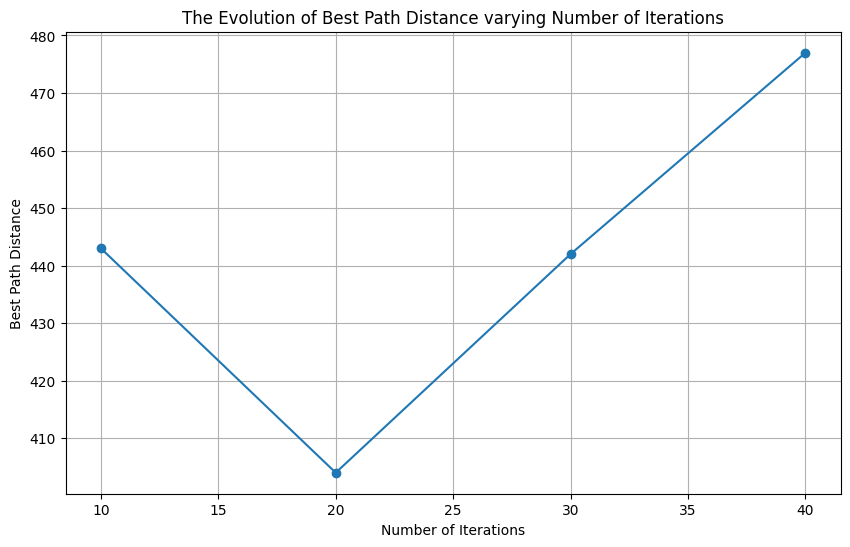

In [39]:
n_iterations_list = [10, 20, 30, 40]
time_params = []
distance_params = []
for n_iterations in n_iterations_list:
    _, best_total_length, _, _, execution_time = ant_colony_optimization_vrp(cities, n_ants=10, n_iterations=n_iterations, alpha=2, beta=2, evaporation_rate=0.4, Q=70, n_trucks=3)
    time_params.append(execution_time)
    distance_params.append(best_total_length)

plot_time_param(time_params, n_iterations_list, 'Number of iterations')
plot_distance_param(distance_params, n_iterations_list, 'Number of Iterations')

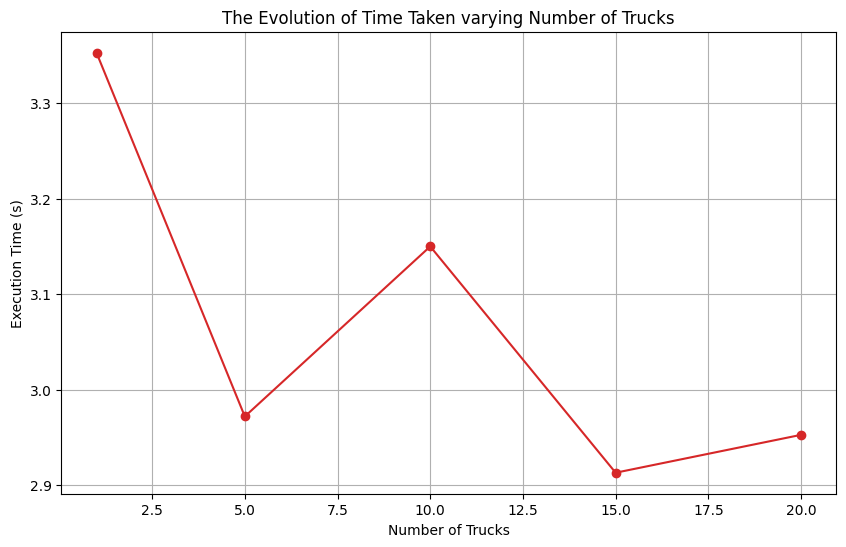

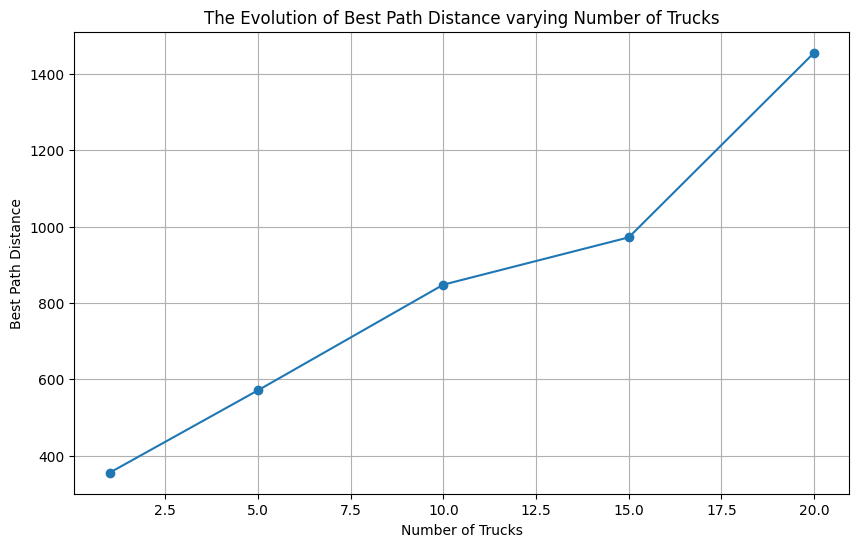

In [38]:
n_cities_trucks = 1000 # Number of cities
cities_trucks = np.random.randint(1, 101, size=(n_cities_trucks, n_cities_trucks)) # Initizaliting adjcency matrix with weight from 1 to 100 and n cities
n_trucks_list = [1, 5, 10, 15, 20]
time_params = []
distance_params = []
for n_trucks in n_trucks_list:
    _, best_total_length, _, _, execution_time = ant_colony_optimization_vrp(cities, n_ants=10, n_iterations=40, alpha=2, beta=2, evaporation_rate=0.4, Q=70, n_trucks=n_trucks)
    time_params.append(execution_time)
    distance_params.append(best_total_length)

plot_time_param(time_params, n_trucks_list, 'Number of Trucks')
plot_distance_param(distance_params, n_trucks_list, 'Number of Trucks')

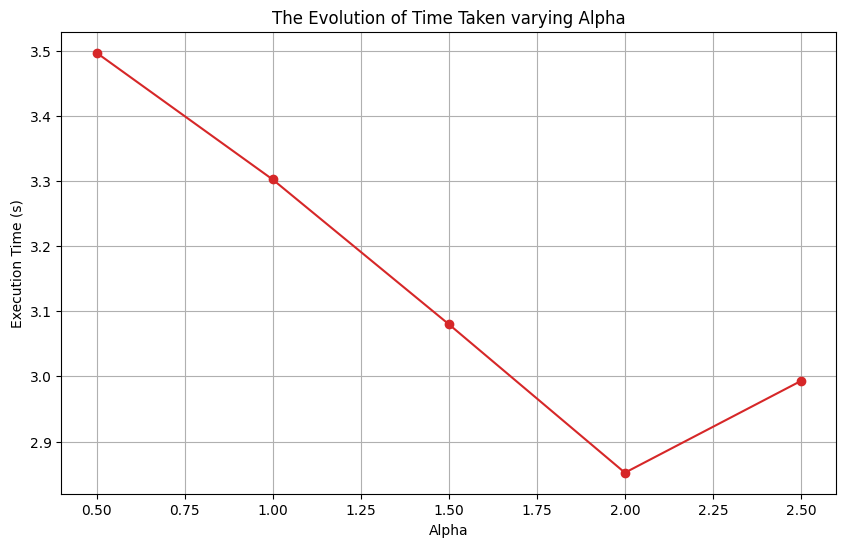

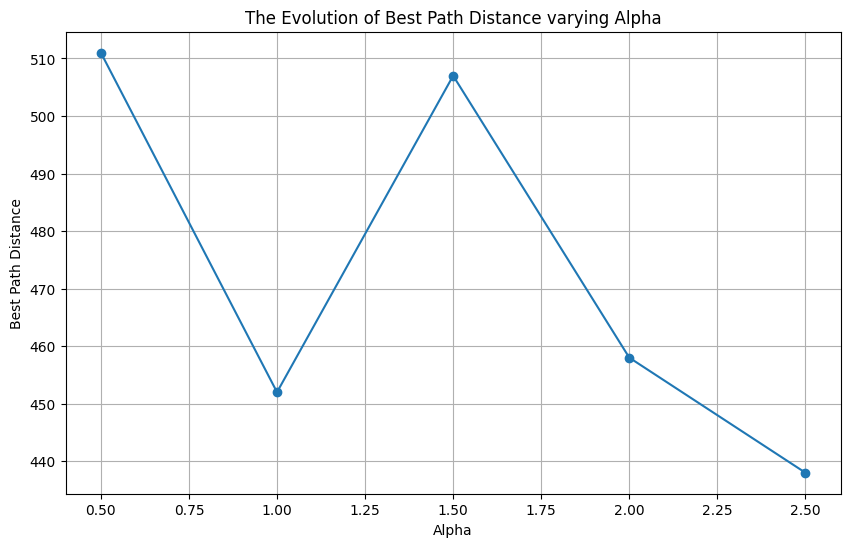

In [37]:
alpha_list = [0.5, 1, 1.5, 2, 2.5]
time_params = []
distance_params = []

for alpha in alpha_list:
    _, best_total_length, _, _, execution_time = ant_colony_optimization_vrp(cities, n_ants=10, n_iterations=40, alpha=alpha, beta=2, evaporation_rate=0.4, Q=70, n_trucks=3)
    time_params.append(execution_time)
    distance_params.append(best_total_length)

plot_time_param(time_params, alpha_list, 'Alpha')
plot_distance_param(distance_params, alpha_list, 'Alpha')


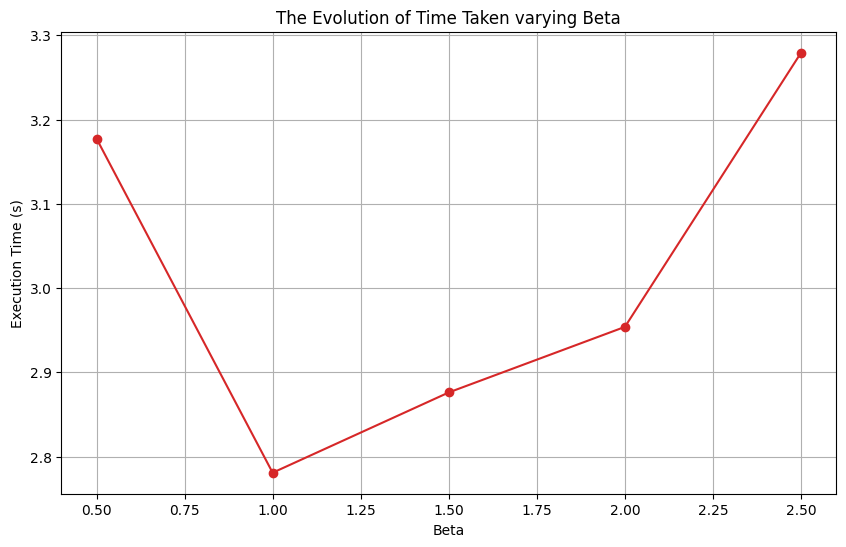

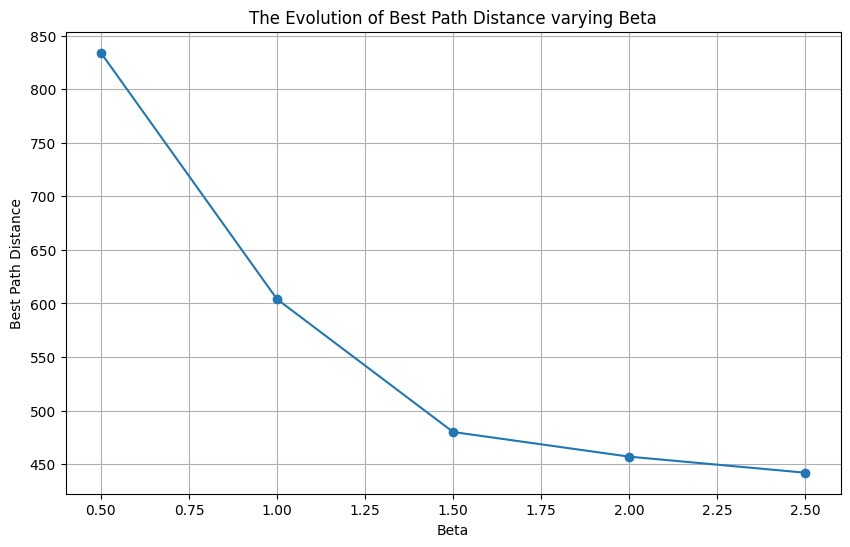

In [36]:
beta_list = [0.5, 1, 1.5, 2, 2.5]
time_params = []
distance_params = []

for beta in beta_list:
    _, best_total_length, _, _, execution_time = ant_colony_optimization_vrp(cities, n_ants=10, n_iterations=40, alpha=2, beta=beta, evaporation_rate=0.4, Q=70, n_trucks=3)
    time_params.append(execution_time)
    distance_params.append(best_total_length)

plot_time_param(time_params, beta_list, 'Beta')
plot_distance_param(distance_params, beta_list, 'Beta')
